In [1]:
from PIL import Image;
import numpy as np;
import operator
import matplotlib.pyplot as plt;
import random;
import math;

In [2]:
D = (255**2)*3;

def dist(PIX_A, PIX_B):
    d = (PIX_A[0] - PIX_B[0])**2 + (PIX_A[1] - PIX_B[1])**2 + (PIX_A[2] - PIX_B[2])**2;
    return math.sqrt(d/D);
#     return d;

In [3]:
D

195075

In [4]:
source_image = Image.open('Source_Images/source_001.JPG')
source_pix = source_image.load()

In [5]:
source_image.size

(1334, 872)

In [6]:
matrix = np.zeros((source_image.size[0],source_image.size[1]))

In [7]:
for i in range(0, source_image.size[0], 1):
    for j in range(0, source_image.size[1], 1):
        dissimilarity = 0;
        ct = 0;
        if(i-1 >= 0):
            dissimilarity += dist(source_pix[i, j], source_pix[i-1, j])
            ct += 1;
        if(i+1 < source_image.size[0]):
            dissimilarity += dist(source_pix[i, j], source_pix[i+1, j])
            ct += 1;
        if(j-1 >= 0):
            dissimilarity += dist(source_pix[i, j], source_pix[i, j-1])
            ct += 1;
        if(j+1 < source_image.size[1]):
            dissimilarity += dist(source_pix[i, j], source_pix[i, j+1])
            ct += 1;
        
        Diss = dissimilarity/ct;
        matrix[i][j] = Diss;

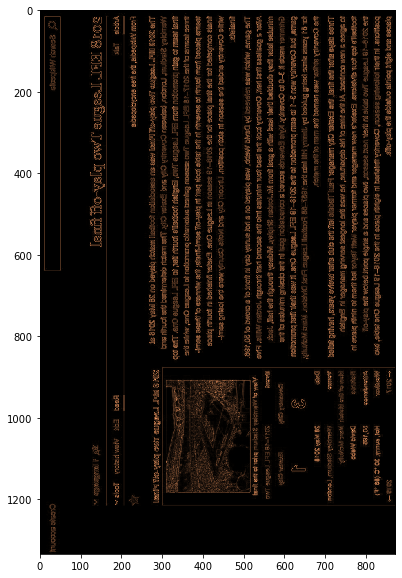

In [8]:
fig = plt.figure(figsize = (10,10)) 
plt.imshow( matrix , cmap = 'copper' , interpolation = 'nearest')
plt.savefig('A.jpg')

In [9]:
A = matrix;
B = matrix;
c = 0.8;

for i in range(0, source_image.size[0], 1):
    for j in range(0, source_image.size[1], 1):
        top, left = 0, 0;
        if(i-1 >= 0):
            top = A[i-1][j];
        if(j-1 >= 0):
            left = A[i][j-1];
        
        A[i][j] += top*(c) + left*(c);

for i in range(source_image.size[0]-1, -1, -1):
    for j in range(source_image.size[1]-1, -1, -1):
        right, down = 0, 0;
        if(i+1 < source_image.size[0]):
            down = B[i+1][j];
        if(j+1 < source_image.size[1]):
            right = B[i][j+1];
        
        B[i][j] += down*(c) + right*(c);
        
matrix = matrix + A + B;

<ipython-input-9-740bc9a02ad2>:13: RuntimeWarning: overflow encountered in double_scalars
  A[i][j] += top*(c) + left*(c);


C:\Users\parma\anaconda3\lib\site-packages\matplotlib\image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\parma\anaconda3\lib\site-packages\matplotlib\image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\parma\anaconda3\lib\site-packages\matplotlib\image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)


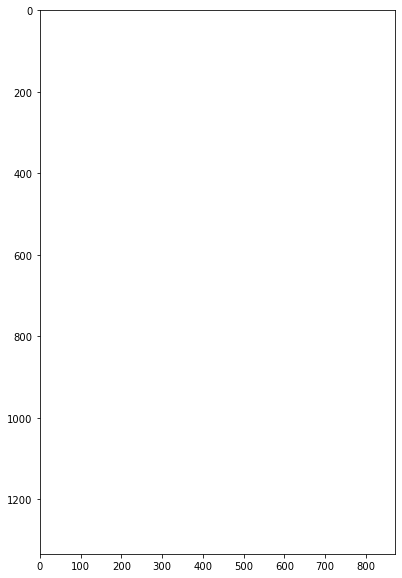

In [10]:
fig = plt.figure(figsize = (10,10)) 
plt.imshow( matrix , cmap = 'copper' , interpolation = 'nearest')
plt.savefig('B.jpg')